In [67]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm

In [33]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1)

In [39]:
snowflake = pdr.DataReader("SNOW",data_source='yahoo',start,end)
domo = pdr.DataReader("DOMO",data_source='yahoo',start,end)
amazon = pdr.DataReader("AMZN",data_source='yahoo',start,end)

In [40]:
snowflake.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-16,319.0,231.110001,245.000000,253.929993,36099700,253.929993
2020-09-17,241.5,215.240005,230.759995,227.539993,11907500,227.539993
2020-09-18,249.0,218.589996,235.000000,240.000000,7475400,240.000000
2020-09-21,241.5,218.600006,230.000000,228.850006,5524900,228.850006
2020-09-22,239.0,225.149994,238.500000,235.160004,3889100,235.160004


In [41]:
domo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,21.950001,20.900000,21.940001,21.040001,673200,21.040001
2020-01-03,21.790001,20.580000,20.840000,21.500000,366200,21.500000
2020-01-06,22.750000,21.260000,21.389999,22.690001,407100,22.690001
2020-01-07,22.969999,22.537001,22.700001,22.650000,225400,22.650000
2020-01-08,23.150000,22.440001,22.770000,22.610001,202200,22.610001


In [42]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971


<function matplotlib.pyplot.show(close=None, block=None)>

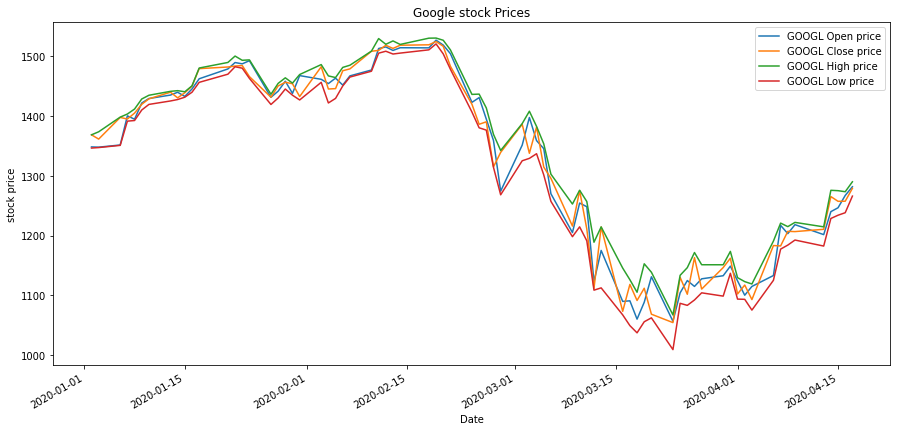

In [13]:
# visualize stock price
google['Open'].plot(label='GOOGL Open price',figsize=(15,7))
google['Close'].plot(label='GOOGL Close price')
google['High'].plot(label='GOOGL High price')
google['Low'].plot(label='GOOGL Low price')
plt.legend()
plt.title('Google stock Prices')
plt.ylabel('stock price')

plt.show

In [ ]:
# visualize volume traded
google['Volume'].plot(figsize=(17,5))
plt.title('Volume ')

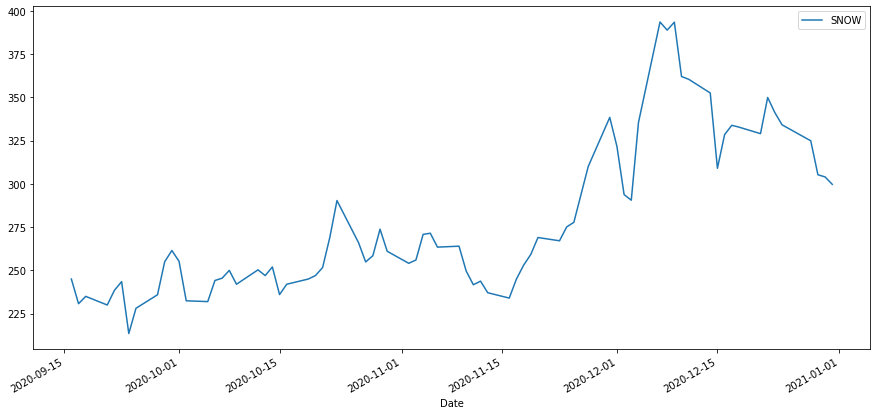

In [45]:
snowflake['Open'].plot(label='SNOW',figsize=(15,7))
#domo['Open'].plot(label='DOMO',figsize=(15,7))
#amazon['Open'].plot(label='AMZN',figsize=(15,7))
plt.legend()

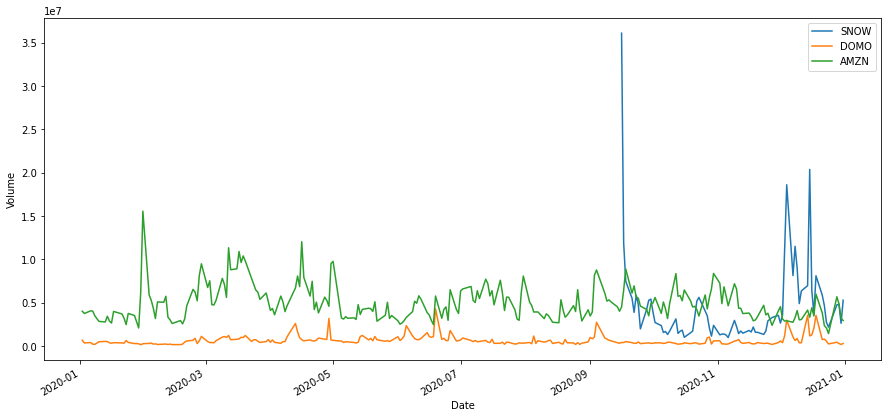

In [46]:
#small scale cannot be visualized
snowflake['Volume'].plot(label='SNOW',figsize=(15,7))
domo['Volume'].plot(label='DOMO')
amazon['Volume'].plot(label='AMZN')
plt.ylabel('Volume')
plt.legend()

In [47]:
snowflake.iloc[[snowflake['Volume'].argmax()]]
#IPO for snowflake

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-16,319.0,231.110001,245.0,253.929993,36099700,253.929993


<AxesSubplot:xlabel='Date'>

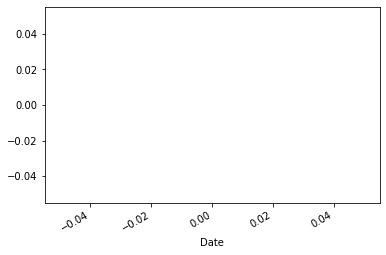

In [49]:
snowflake.iloc[250:400]['Open'].plot()

In [52]:
# analyze total market cap (not only the stock price)
snowflake['Total Traded'] = snowflake['Open']*snowflake['Volume']
domo['Total Traded'] = domo['Open']*domo['Volume']
amazon['Total Traded'] = amazon['Open']*amazon['Volume']

In [51]:
snowflake.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-09-16,319.0,231.110001,245.000000,253.929993,36099700,253.929993,8.844426e+09
2020-09-17,241.5,215.240005,230.759995,227.539993,11907500,227.539993,2.747775e+09
2020-09-18,249.0,218.589996,235.000000,240.000000,7475400,240.000000,1.756719e+09
2020-09-21,241.5,218.600006,230.000000,228.850006,5524900,228.850006,1.270727e+09
2020-09-22,239.0,225.149994,238.500000,235.160004,3889100,235.160004,9.275504e+08


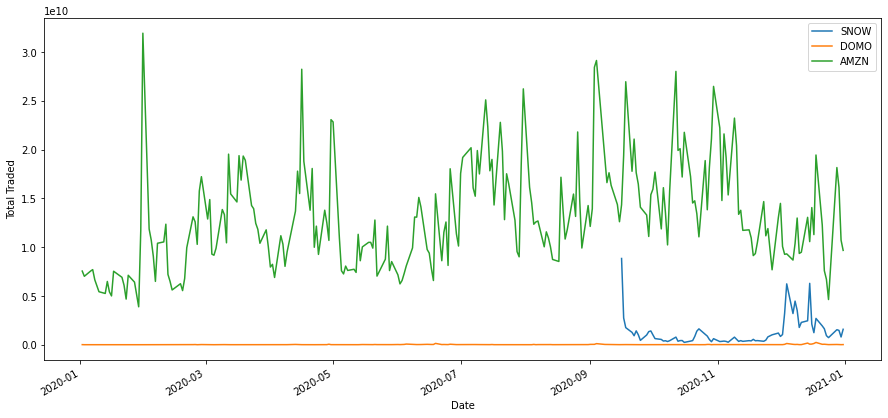

In [53]:
snowflake['Total Traded'].plot(label='SNOW',figsize=(15,7))
domo['Total Traded'].plot(label='DOMO')
amazon['Total Traded'].plot(label='AMZN')
plt.ylabel('Total Traded')
plt.legend()

In [54]:
amazon['Total Traded'].argmax()

20

In [55]:
amazon.iloc[[amazon['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-01-31,2055.719971,2002.27002,2051.469971,2008.719971,15567300,2008.719971,3.193585e+10


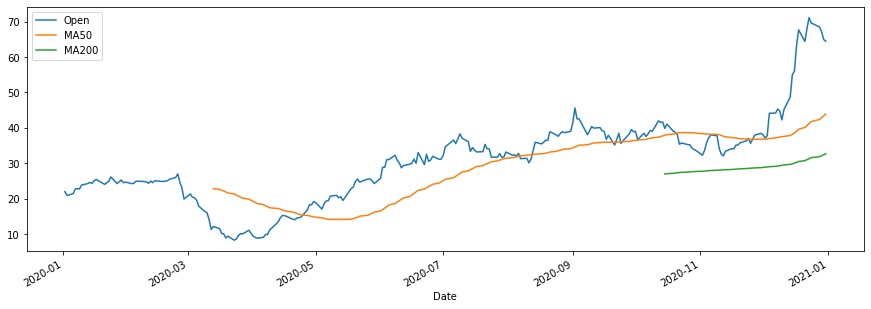

In [60]:
domo['Open'].plot(figsize=(15,5))
domo['moving_average_50'] = domo['Open'].rolling(50).mean()
domo['moving_average_50'].plot(label='MA50')
domo['moving_average_200'] = domo['Open'].rolling(200).mean()
domo['moving_average_200'].plot(label='MA200')
plt.legend()

In [61]:
domo.isna().sum()

High                    0
Low                     0
Open                    0
Close                   0
Volume                  0
Adj Close               0
Total Traded            0
moving_average_50      49
moving_average_200    199
dtype: int64

In [62]:
domo[['Open','High','Low']].corr()

,Open,High,Low
Open,1.000000,0.996767,0.997759
High,0.996767,1.000000,0.996991
Low,0.997759,0.996991,1.000000


In [64]:
x = domo[['Open','High','Low']]
y = domo['Close']

In [68]:
X_1 = sm.add_constant(x)
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.857e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:22:31   Log-Likelihood:                -216.39
No. Observations:                 253   AIC:                             440.8
Df Residuals:                     249   BIC:                             454.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1071      0.099      1.082      0.280      -0.088       0.302
Open          -0.5858      0.048    -12.187      0.000      -0.681      -0.491
High           0.6821      0.040     16.952      0.000       0.603       0.761
Low            0.9074      0.051     17.870      0.000       0.807       1.007
==============================================================================
Omnibus:                       15.475   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.855
Skew:                          -0.318   Prob(JB):                     5.42e-07
Kurtosis:                       4.528   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
ypred =model.predict(X_1)
ypred

Date
2020-01-02    21.191485
2020-01-03    21.436397
2020-01-06    22.386075
2020-01-07    22.927444
2020-01-08    22.921204
                ...    
2020-12-24    67.462516
2020-12-28    67.047560
2020-12-29    64.881555
2020-12-30    65.709763
2020-12-31    64.840257
Length: 253, dtype: float64

In [71]:
domo['pred'] = ypred
domo['error']=y-ypred
domo.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,moving_average_50,moving_average_200,pred,error
Date,,,,,,,,,,,
2020-01-02,21.950001,20.900000,21.940001,21.040001,673200,21.040001,1.477001e+07,NaN,NaN,21.191485,-0.151484
2020-01-03,21.790001,20.580000,20.840000,21.500000,366200,21.500000,7.631608e+06,NaN,NaN,21.436397,0.063603
2020-01-06,22.750000,21.260000,21.389999,22.690001,407100,22.690001,8.707869e+06,NaN,NaN,22.386075,0.303925
2020-01-07,22.969999,22.537001,22.700001,22.650000,225400,22.650000,5.116580e+06,NaN,NaN,22.927444,-0.277444
2020-01-08,23.150000,22.440001,22.770000,22.610001,202200,22.610001,4.604094e+06,NaN,NaN,22.921204,-0.311204


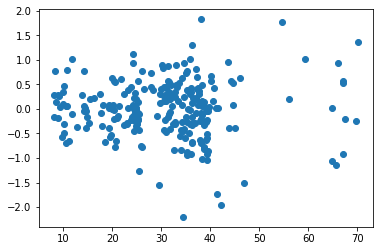

In [73]:
plt.scatter(domo['pred'], domo['error'])
plt.show()

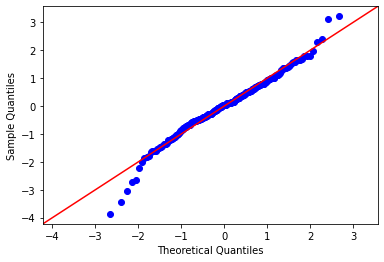

In [74]:
res = model.resid
fig =sm.qqplot(res, fit =True , line='45')

In [75]:
domo.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,moving_average_50,moving_average_200,pred,error
Date,,,,,,,,,,,
2020-01-02,21.950001,20.900000,21.940001,21.040001,673200,21.040001,1.477001e+07,NaN,NaN,21.191485,-0.151484
2020-01-03,21.790001,20.580000,20.840000,21.500000,366200,21.500000,7.631608e+06,NaN,NaN,21.436397,0.063603
2020-01-06,22.750000,21.260000,21.389999,22.690001,407100,22.690001,8.707869e+06,NaN,NaN,22.386075,0.303925
2020-01-07,22.969999,22.537001,22.700001,22.650000,225400,22.650000,5.116580e+06,NaN,NaN,22.927444,-0.277444
2020-01-08,23.150000,22.440001,22.770000,22.610001,202200,22.610001,4.604094e+06,NaN,NaN,22.921204,-0.311204
